# Supervised Machine Learning Models for Music Genre Classification

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import numpy as np
import joblib
import logging
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/features_3_sec.csv')

### Preprocess Data

In [3]:
def preprocess_data(df):
    X = df.drop(columns=['label', 'filename'])
    y = df['label']

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    lbl_enc = LabelEncoder()
    y_encoded = lbl_enc.fit_transform(y)

    return X_scaled, y_encoded, lbl_enc

X_scaled, y_encoded, lbl_enc = preprocess_data(df)

In [4]:
random_state = 35

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=random_state)

### Initialize Models

In [5]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=random_state),
    'SVM': SVC(random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'XGB': XGBClassifier(random_state=random_state)
}

In [6]:
def model_assess(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, "predict_proba") else "N/A"
    
    print(model)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)
    print(f"ROC-AUC Score: {roc_auc}")
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### Assess Models

Evaluating model: Random Forest
RandomForestClassifier(n_estimators=1000, random_state=35)
Accuracy: 0.8739
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       221
           1       0.90      0.96      0.93       182
           2       0.82      0.87      0.84       194
           3       0.87      0.85      0.86       197
           4       0.90      0.84      0.87       188
           5       0.86      0.88      0.87       225
           6       0.86      0.96      0.91       216
           7       0.92      0.89      0.90       193
           8       0.82      0.86      0.84       196
           9       0.86      0.72      0.78       186

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998

Confusion Matrix:
[[201   0   5   0   0   2   7   0   6   0]
 [  0 175   1   0   0   4   0   0   1   1]
 [  2 

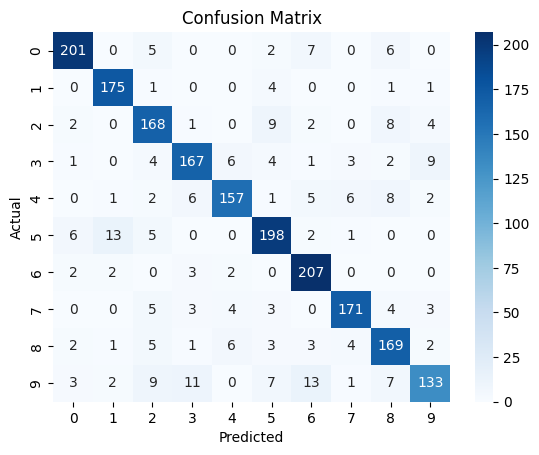

Evaluating model: SVM
SVC(random_state=35)
Accuracy: 0.7422
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       221
           1       0.89      0.95      0.92       182
           2       0.70      0.62      0.66       194
           3       0.67      0.66      0.66       197
           4       0.74      0.64      0.69       188
           5       0.81      0.83      0.82       225
           6       0.79      0.87      0.83       216
           7       0.89      0.80      0.84       193
           8       0.70      0.69      0.70       196
           9       0.53      0.54      0.53       186

    accuracy                           0.74      1998
   macro avg       0.74      0.74      0.74      1998
weighted avg       0.74      0.74      0.74      1998

Confusion Matrix:
[[172   0   7   1   0   9  19   0   6   7]
 [  1 173   0   0   0   4   0   0   0   4]
 [ 19   0 121   5   0  17   2   1   3  26]
 [  2   1  

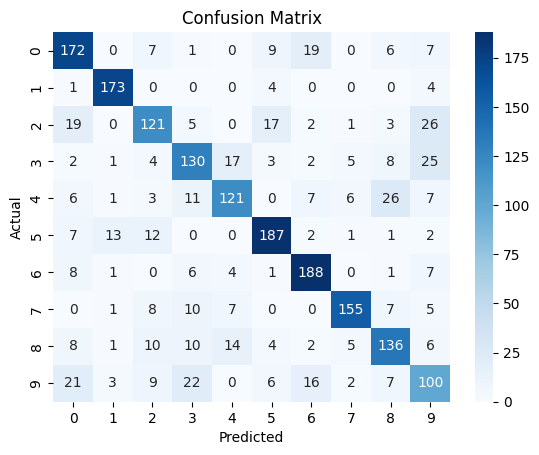

Evaluating model: KNN
KNeighborsClassifier(n_neighbors=10)
Accuracy: 0.8724
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       221
           1       0.88      0.96      0.92       182
           2       0.84      0.85      0.85       194
           3       0.83      0.90      0.86       197
           4       0.90      0.77      0.83       188
           5       0.88      0.84      0.86       225
           6       0.95      0.90      0.92       216
           7       0.94      0.88      0.91       193
           8       0.79      0.90      0.84       196
           9       0.81      0.81      0.81       186

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998

Confusion Matrix:
[[200   0   4   2   0   3   2   0   8   2]
 [  0 175   1   1   0   3   0   0   0   2]
 [  3   1 165   2   0   6   0   0   9 

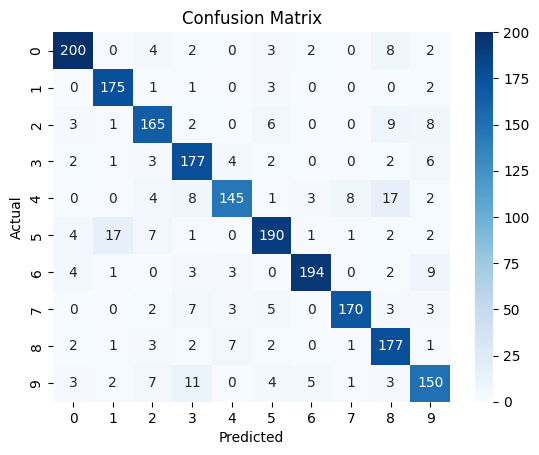

Evaluating model: Decision Tree
DecisionTreeClassifier(random_state=35)
Accuracy: 0.6446
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       221
           1       0.80      0.86      0.83       182
           2       0.51      0.52      0.51       194
           3       0.50      0.53      0.52       197
           4       0.64      0.65      0.65       188
           5       0.73      0.66      0.69       225
           6       0.77      0.78      0.77       216
           7       0.81      0.73      0.77       193
           8       0.57      0.59      0.58       196
           9       0.51      0.52      0.51       186

    accuracy                           0.64      1998
   macro avg       0.65      0.64      0.64      1998
weighted avg       0.65      0.64      0.65      1998

Confusion Matrix:
[[136   1  22   5   4  10  16   2  10  15]
 [  3 157   4   2   0  10   0   0   2   4]
 [ 16   3 100  10   4  17

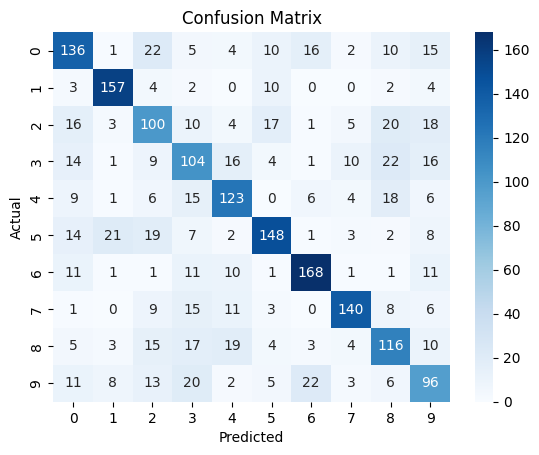

Evaluating model: XGB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy: 0.9024
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       221
           1       0.91      0.97      0.94       182
        

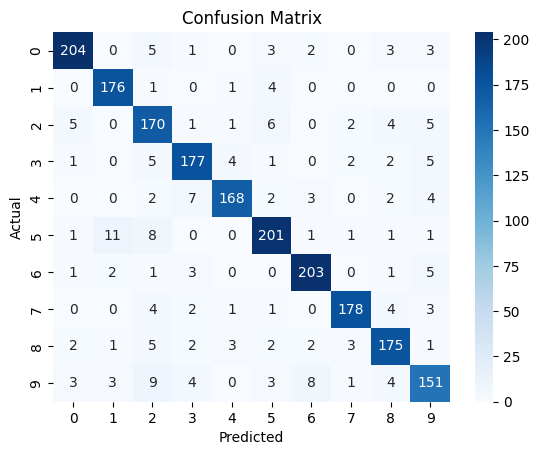

In [7]:
for model_name, model in models.items():
    print(f'Evaluating model: {model_name}')
    model_assess(model, X_train, X_test, y_train, y_test)

### Tune Hyperparameters of Best Model

In [8]:
param_grid = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 21, 2),
    'min_child_weight': np.arange(1, 21, 2),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=random_state), param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=random_state, n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
print(f"Best parameters found by RandomizedSearchCV: {best_params_random}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=13, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=17, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=17, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=17, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=13, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_ra

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=1

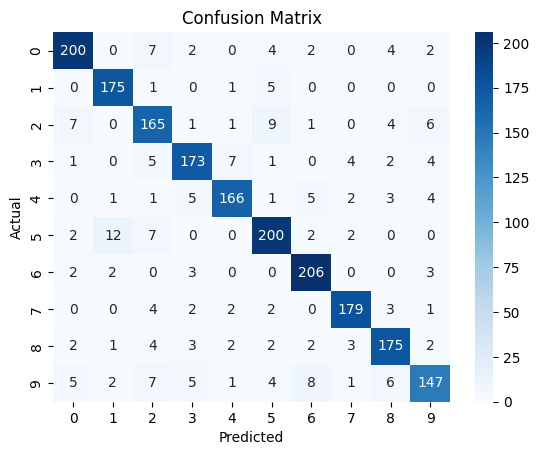

['best_xgb_model.pkl']

In [9]:
param_grid_refined = {
    'n_estimators': [best_params_random['n_estimators']],
    'learning_rate': [best_params_random['learning_rate']],
    'max_depth': [best_params_random['max_depth'] - 1, best_params_random['max_depth'], best_params_random['max_depth'] + 1],
    'min_child_weight': [best_params_random['min_child_weight'] - 1, best_params_random['min_child_weight'], best_params_random['min_child_weight'] + 1],
    'subsample': [best_params_random['subsample']],
    'colsample_bytree': [best_params_random['colsample_bytree']],
    'gamma': [best_params_random['gamma']],
    'reg_alpha': [best_params_random['reg_alpha']],
    'reg_lambda': [best_params_random['reg_lambda']],
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=random_state), param_grid=param_grid_refined, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_
print(f"Best parameters found by GridSearchCV: {best_params_grid}")

best_xgb_model = grid_search.best_estimator_
model_assess(best_xgb_model, X_train, X_test, y_train, y_test)

joblib.dump(best_xgb_model, 'best_xgb_model.pkl')


# Recommendation System

In [10]:
knn_model_1 = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model_1.fit(X_scaled)

joblib.dump(knn_model_1, 'knn_model.pkl')

['knn_model.pkl']

In [11]:
def song_recommendation(song_index, n_recommendations=5):
    distances, indices = knn_model_1.kneighbors([X_scaled[song_index]], n_neighbors=n_recommendations + 1)
    similar_songs_for_recommendation = indices[0][1:]
    return similar_songs_for_recommendation

song_index = 412
recommended_indices = song_recommendation(song_index=song_index)

print("Recommended songs indices:", recommended_indices)
print("Recommended songs genres:", lbl_enc.inverse_transform(y_encoded[recommended_indices]))

Recommended songs indices: [411 418 419 414 413]
Recommended songs genres: ['blues' 'blues' 'blues' 'blues' 'blues']


In [12]:
xgb_model_1 = XGBClassifier(**best_params_grid)
xgb_model_1.fit(X_train, y_train)
y_pred = xgb_model_1.predict(X_test)

def predict_genre(song_features):
    # Predict the genre using XGBoost
    predicted_genre_encoded = xgb_model_1.predict([song_features])[0]
    predicted_genre = lbl_enc.inverse_transform([predicted_genre_encoded])[0]
    return predicted_genre

In [13]:
test_1_index = 139

test_song_features = X_scaled[test_1_index]
predicted_genre = predict_genre(test_song_features)

print(f'Test song genre: {predicted_genre}')

# Get similar songs
recommended_indices = song_recommendation(test_1_index)
recommended_genres_encoded = y_encoded[recommended_indices]
recommended_genres = lbl_enc.inverse_transform(recommended_genres_encoded)

print("Recommended similar songs indices:", recommended_indices)
print("Recommended similar songs genres:", recommended_genres)



Test song genre: blues
Recommended similar songs indices: [5197  185  186 2975  181]
Recommended similar songs genres: ['jazz' 'blues' 'blues' 'country' 'blues']


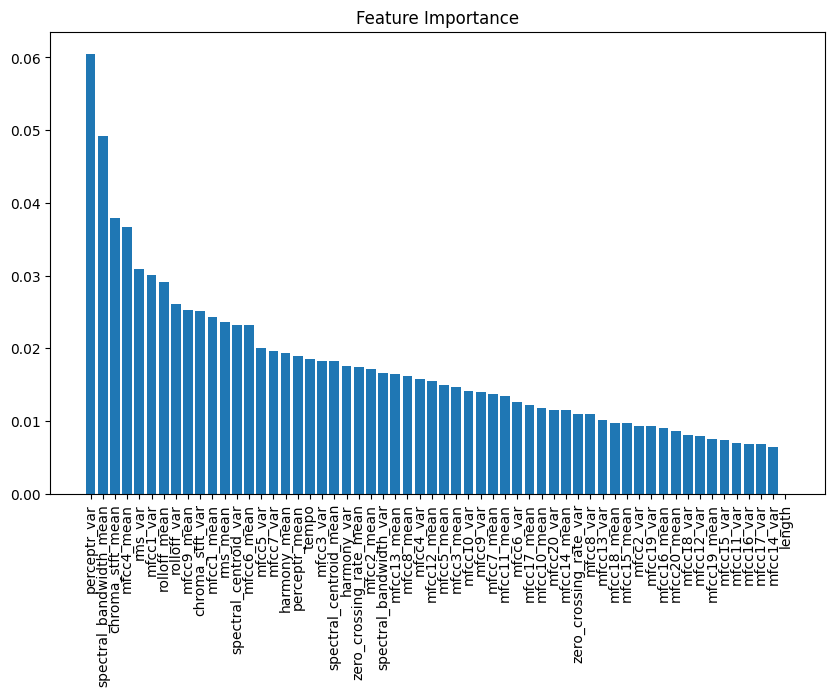

In [14]:
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title("Feature Importance")
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
        plt.show()

plot_feature_importance(best_xgb_model, df.drop(columns=['label', 'filename']).columns)